In [1]:
import sys
sys.path.append("../py")
from trajectory import orbit2orbit
import pygmo as pg
import pygmo_plugins_nonfree as pg7
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
%matplotlib notebook

In [2]:
udp = orbit2orbit(nseg=50, mass=1000, tmax=0.05, isp=2500)
prob = pg.problem(udp)
prob.c_tol = [1e-6]*(7 + udp.nseg)
print(prob)

Problem name: <class 'trajectory.orbit2orbit'>
	Global dimension:			154
	Integer dimension:			0
	Fitness dimension:			58
	Number of objectives:			1
	Equality constraints dimension:		7
	Inequality constraints dimension:	50
	Tolerances on constraints: [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, ... ]
	Lower bounds: [200, 100, 0, 0, -1, ... ]
	Upper bounds: [3000, 1000, 6.28319, 6.28319, 1, ... ]

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [3]:
uda = pg7.snopt7(True, "/usr/lib/libsnopt7_c.so")
uda.set_integer_option("Major iterations limit", 4000)
uda.set_integer_option("Iterations limit", 20000)
uda.set_numeric_option("Major optimality tolerance", 1e-3)
uda.set_numeric_option("Major feasibility tolerance", 1e-10)
algo = pg.algorithm(uda)
#uda = pg.mbh(algo, 5, 0.5)
#algo = pg.algorithm(uda)

In [4]:
pop = pg.population(prob, 1)

In [5]:
pop = algo.evolve(pop)

In [6]:
print(prob.feasibility_x(pop.champion_x))

True


<IPython.core.display.Javascript object>


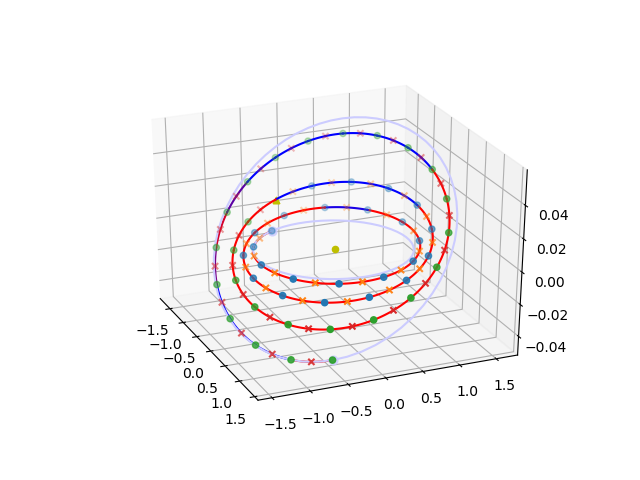

In [7]:
udp.plot(pop.champion_x)

<IPython.core.display.Javascript object>


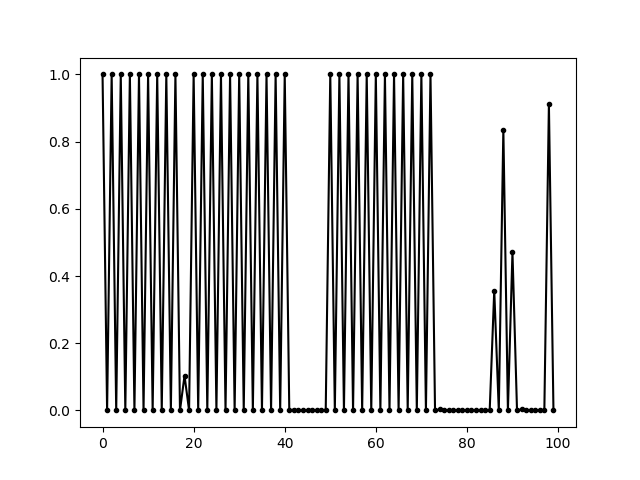

In [34]:
#u = np.asarray(u)
#u = u.reshape((udp.nseg, 3))
u = norm(u, None, 1)
plt.close()
plt.plot(u, "k.-")
plt.show()

In [37]:
u = udp.controls.reshape((udp.nseg, 3))
ind = np.arange(1, udp.nseg + 1, 1)
u = np.insert(u, ind, [0, 0, 0], axis=0)
u = u.flatten()


array([  6.96292365e-01,  -6.77717698e-01,  -2.36380338e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         9.63086957e-01,  -1.83122179e-01,  -1.97306316e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         9.22871337e-01,   3.73115734e-01,  -9.53579941e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         5.85344957e-01,   8.09997064e-01,   3.57216663e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         7.08591745e-02,   9.85853826e-01,   1.51892111e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -4.42552207e-01,   8.69264073e-01,   2.20289626e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -8.22720794e-01,   5.20746637e-01,   2.27932983e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -9.84117814e-01,   3.39319283e-02,   1.74243370e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -8.81490110e-01,

In [1]:
pop.champion_x

NameError: name 'pop' is not defined